In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the dataset
Data=pd.read_csv('bank.csv')
Data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
#checking out of null values
Data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [4]:
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
Data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [6]:
#finding out of differnt values that are present in the column
Data['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [7]:
#Filling of unknown values in job column using a mode technique
Data['job'].replace({"unknown":"management"},inplace=True)
Data['job'].value_counts()

management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64

In [8]:
Data['marital'].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [9]:
Data['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [10]:
Data['education'].replace({"unknown":"secondary"},inplace=True)
Data['education'].value_counts()

secondary    5973
tertiary     3689
primary      1500
Name: education, dtype: int64

In [11]:
Data['default'].value_counts()

no     10994
yes      168
Name: default, dtype: int64

In [12]:
Data['housing'].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [13]:
Data['loan'].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [14]:
Data['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [15]:
Data['month'].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [16]:
Data['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [17]:
Data.drop(["contact","month","poutcome"],axis=1,inplace=True)
Data

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,1042,1,-1,0,yes
1,56,admin.,married,secondary,no,45,no,no,5,1467,1,-1,0,yes
2,41,technician,married,secondary,no,1270,yes,no,5,1389,1,-1,0,yes
3,55,services,married,secondary,no,2476,yes,no,5,579,1,-1,0,yes
4,54,admin.,married,tertiary,no,184,no,no,5,673,2,-1,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,20,257,1,-1,0,no
11158,39,services,married,secondary,no,733,no,no,16,83,4,-1,0,no
11159,32,technician,single,secondary,no,29,no,no,19,156,2,-1,0,no
11160,43,technician,married,secondary,no,0,no,yes,8,9,2,172,5,no


In [18]:
Data.shape

(11162, 14)

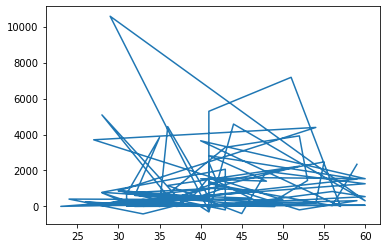

In [19]:
plt.plot(Data.iloc[0:100,0],Data.iloc[0:100,5])

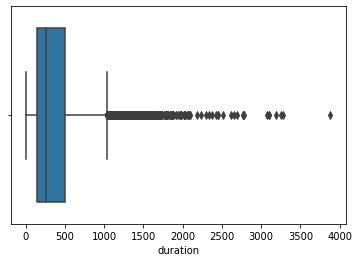

In [20]:
import seaborn as sns
sns.boxplot(Data['duration'])

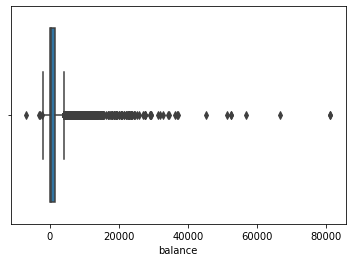

In [21]:
sns.boxplot(Data['balance'])

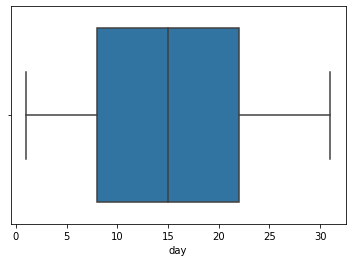

In [22]:
sns.boxplot(Data['day'])

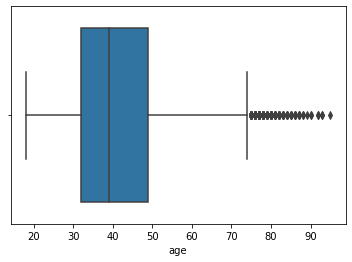

In [23]:
sns.boxplot(Data['age'])

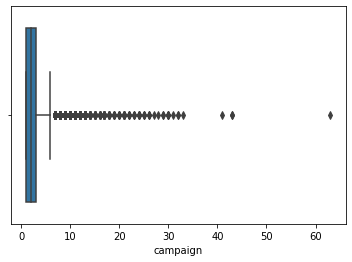

In [24]:
sns.boxplot(Data['campaign'])

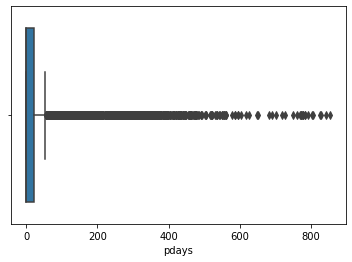

In [25]:
sns.boxplot(Data['pdays'])

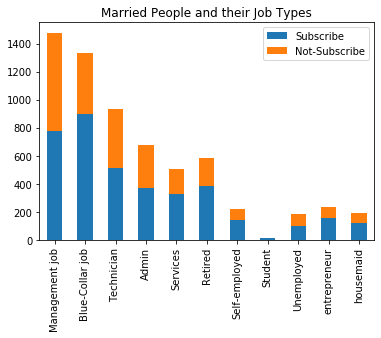

In [26]:
manage_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}

manage_married['Subscribe']=Data.loc[(Data['job']=='management') & (Data['marital']=='married'),'deposit'].value_counts()[0]
manage_married['Not-Subscribe']=Data.loc[(Data['job']=='management') & (Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Management job']
#create the Dataframe
management_married=pd.DataFrame([manage_married])
management_married.index=index_
#for blue_collar 
blue_collar_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
blue_collar_married['Subscribe']=Data.loc[(Data['job']=='blue-collar') & (Data['marital']=='married'),'deposit'].value_counts()[0]
blue_collar_married['Not-Subscribe']=Data.loc[(Data['job']=='blue-collar') & (Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Blue-Collar job']
#create the Dataframe
blue_collar_marriedd=pd.DataFrame([blue_collar_married])
blue_collar_marriedd.index=index_

technician_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
technician_married['Subscribe']=Data.loc[(Data['job']=='technician')&(Data['marital']=='married'),'deposit'].value_counts()[0]
technician_married['Not-Subscribe']=Data.loc[(Data['job']=='technician')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Technician']
#create the Dataframe
technician=pd.DataFrame([technician_married])
technician.index=index_

admin_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
admin_married['Subscribe']=Data.loc[(Data['job']=='admin.')&(Data['marital']=='married'),'deposit'].value_counts()[0]
admin_married['Not-Subscribe']=Data.loc[(Data['job']=='admin.')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Admin']
#create the Dataframe
admin=pd.DataFrame([admin_married])
admin.index=index_

services_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
services_married['Subscribe']=Data.loc[(Data['job']=='services')&(Data['marital']=='married'),'deposit'].value_counts()[0]
services_married['Not-Subscribe']=Data.loc[(Data['job']=='services')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Services']
#create the Dataframe
services=pd.DataFrame([services_married])
services.index=index_

retired_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
retired_married['Subscribe']=Data.loc[(Data['job']=='retired')&(Data['marital']=='married'),'deposit'].value_counts()[0]
retired_married['Not-Subscribe']=Data.loc[(Data['job']=='retired')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Retired']
#create the Dataframe
retired=pd.DataFrame([retired_married])
retired.index=index_


self_employed_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
self_employed_married['Subscribe']=Data.loc[(Data['job']=='self-employed')&(Data['marital']=='married'),'deposit'].value_counts()[0]
self_employed_married['Not-Subscribe']=Data.loc[(Data['job']=='self-employed')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Self-employed']
#create the Dataframe
self_employed=pd.DataFrame([self_employed_married])
self_employed.index=index_


student_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
student_married['Subscribe']=Data.loc[(Data['job']=='student')&(Data['marital']=='married'),'deposit'].value_counts()[0]
student_married['Not-Subscribe']=Data.loc[(Data['job']=='student')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Student']
#create the Dataframe
student=pd.DataFrame([student_married])
student.index=index_

unemployed_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
unemployed_married['Subscribe']=Data.loc[(Data['job']=='unemployed')&(Data['marital']=='married'),'deposit'].value_counts()[0]
unemployed_married['Not-Subscribe']=Data.loc[(Data['job']=='unemployed')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['Unemployed']
#create the Dataframe
unemployed=pd.DataFrame([unemployed_married])
unemployed.index=index_

entrepreneur_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
entrepreneur_married['Subscribe']=Data.loc[(Data['job']=='entrepreneur')&(Data['marital']=='married'),'deposit'].value_counts()[0]
entrepreneur_married['Not-Subscribe']=Data.loc[(Data['job']=='entrepreneur')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['entrepreneur']
#create the Dataframe
entrepreneur=pd.DataFrame([entrepreneur_married])
entrepreneur.index=index_

housemaid_married={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
housemaid_married['Subscribe']=Data.loc[(Data['job']=='housemaid')&(Data['marital']=='married'),'deposit'].value_counts()[0]
housemaid_married['Not-Subscribe']=Data.loc[(Data['job']=='housemaid')&(Data['marital']=='married'),'deposit'].value_counts()[1]
#create index
index_=['housemaid']
#create the Dataframe
housemaid=pd.DataFrame([housemaid_married])
housemaid.index=index_

frames=[management_married,blue_collar_marriedd,technician,admin,services,retired,self_employed,student,unemployed,entrepreneur,housemaid]
result=pd.concat(frames)
job_married = pd.DataFrame(result)

job_married[["Subscribe","Not-Subscribe"]].plot(kind="bar",stacked=True)
plt.title("Married People and their Job Types")
plt.show()

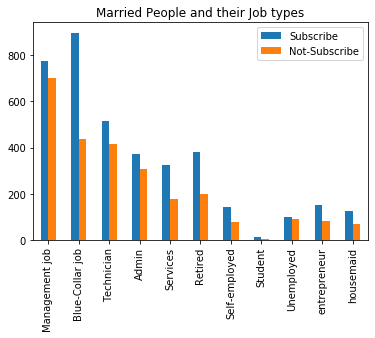

In [27]:
job_married[["Subscribe","Not-Subscribe"]].plot(kind="bar",stacked=False)
plt.title("Married People and their Job types")
plt.show()

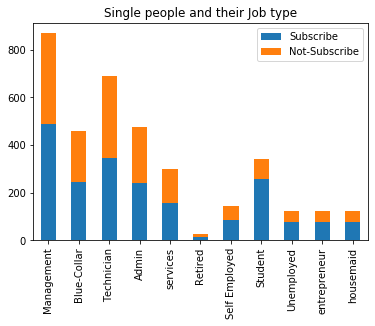

In [28]:
manage_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}

manage_single['Subscribe']=Data.loc[(Data['job']=='management') & (Data['marital']=='single'),'deposit'].value_counts()[0]
manage_single['Not-Subscribe']=Data.loc[(Data['job']=='management') & (Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Management']
#create the Dataframe
management_single=pd.DataFrame([manage_single])
management_single.index=index_
#for blue_collar 

blue_collar_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
blue_collar_single['Subscribe']=Data.loc[(Data['job']=='blue-collar') & (Data['marital']=='single'),'deposit'].value_counts()[0]
blue_collar_single['Not-Subscribe']=Data.loc[(Data['job']=='blue-collar') & (Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Blue-Collar']
#create the Dataframe
blue_collar=pd.DataFrame([blue_collar_single])
blue_collar.index=index_

technician_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
technician_single['Subscribe']=Data.loc[(Data['job']=='technician')&(Data['marital']=='single'),'deposit'].value_counts()[0]
technician_single['Not-Subscribe']=Data.loc[(Data['job']=='technician')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Technician']
#create the Dataframe
technician=pd.DataFrame([technician_single])
technician.index=index_
technician

admin_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
admin_single['Subscribe']=Data.loc[(Data['job']=='admin.')&(Data['marital']=='single'),'deposit'].value_counts()[0]
admin_single['Not-Subscribe']=Data.loc[(Data['job']=='admin.')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Admin']
#create the Dataframe
admin=pd.DataFrame([admin_single])
admin.index=index_

services_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
services_single['Subscribe']=Data.loc[(Data['job']=='services')&(Data['marital']=='single'),'deposit'].value_counts()[0]
services_single['Not-Subscribe']=Data.loc[(Data['job']=='services')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['services']
#create the Dataframe
services=pd.DataFrame([services_single])
services.index=index_

retired_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
retired_single['Subscribe']=Data.loc[(Data['job']=='retired')&(Data['marital']=='single'),'deposit'].value_counts()[0]
retired_single['Not-Subscribe']=Data.loc[(Data['job']=='retired')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Retired']
#create the Dataframe
retired=pd.DataFrame([retired_single])
retired.index=index_

self_employed_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
self_employed_single['Subscribe']=Data.loc[(Data['job']=='self-employed')&(Data['marital']=='single'),'deposit'].value_counts()[0]
self_employed_single['Not-Subscribe']=Data.loc[(Data['job']=='self-employed')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Self Employed']
#create the Dataframe
self_employed=pd.DataFrame([self_employed_single])
self_employed.index=index_

student_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
student_single['Subscribe']=Data.loc[(Data['job']=='student')&(Data['marital']=='single'),'deposit'].value_counts()[0]
student_single['Not-Subscribe']=Data.loc[(Data['job']=='student')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Student']
#create the Dataframe
student=pd.DataFrame([student_single])
student.index=index_

unemployed_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
unemployed_single['Subscribe']=Data.loc[(Data['job']=='unemployed')&(Data['marital']=='single'),'deposit'].value_counts()[0]
unemployed_single['Not-Subscribe']=Data.loc[(Data['job']=='unemployed')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['Unemployed']
#create the Dataframe
unemployed=pd.DataFrame([unemployed_single])
unemployed.index=index_

entrepreneur_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
entrepreneur_single['Subscribe']=Data.loc[(Data['job']=='entrepreneur')&(Data['marital']=='single'),'deposit'].value_counts()[0]
entrepreneur_single['Not-Subscribe']=Data.loc[(Data['job']=='entrepreneur')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['entrepreneur']
#create the Dataframe
entrepreneur=pd.DataFrame([unemployed_single])
entrepreneur.index=index_

housemaid_single={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
housemaid_single['Subscribe']=Data.loc[(Data['job']=='housemaid')&(Data['marital']=='single'),'deposit'].value_counts()[0]
housemaid_single['Not-Subscribe']=Data.loc[(Data['job']=='housemaid')&(Data['marital']=='single'),'deposit'].value_counts()[1]
#create index
index_=['housemaid']
#create the Dataframe
housemaid=pd.DataFrame([unemployed_single])
housemaid.index=index_

frames2=[management_single,blue_collar,technician,admin,services,retired,self_employed,student,unemployed,entrepreneur,housemaid]
result2=pd.concat(frames2)
job_single = pd.DataFrame(result2)
job_single

job_single[["Subscribe","Not-Subscribe"]].plot(kind="bar",stacked=True)
plt.title("Single people and their Job type")
plt.show()

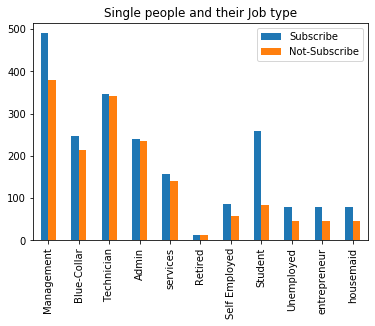

In [29]:
job_single[["Subscribe","Not-Subscribe"]].plot(kind="bar",stacked=False)
plt.title("Single people and their Job type")
plt.show()

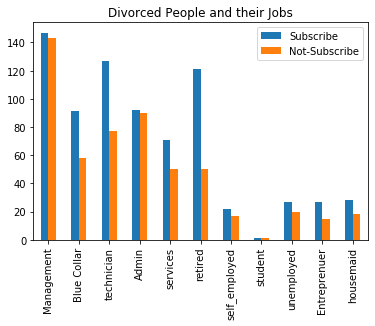

In [30]:
manage_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}

manage_divorced['Subscribe']=Data.loc[(Data['job']=='management') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
manage_divorced['Not-Subscribe']=Data.loc[(Data['job']=='management') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['Management']
#create the Dataframe
management_divorced=pd.DataFrame([manage_divorced])
management_divorced.index=index_
#for blue_collar 

blue_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}

blue_divorced['Subscribe']=Data.loc[(Data['job']=='blue-collar') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
blue_divorced['Not-Subscribe']=Data.loc[(Data['job']=='blue-collar') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['Blue Collar']
#create the Dataframe
blue_divorced=pd.DataFrame([blue_divorced])
blue_divorced.index=index_
#for blue_collar 

technician_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}

technician_divorced['Subscribe']=Data.loc[(Data['job']=='technician') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
technician_divorced['Not-Subscribe']=Data.loc[(Data['job']=='technician') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['technician']
#create the Dataframe
technician_divorced=pd.DataFrame([technician_divorced])
technician_divorced.index=index_
#for blue_collar 

admin_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
admin_divorced['Subscribe']=Data.loc[(Data['job']=='admin.') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
admin_divorced['Not-Subscribe']=Data.loc[(Data['job']=='admin.') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['Admin']
#create the Dataframe
admin_divorced=pd.DataFrame([admin_divorced])
admin_divorced.index=index_
#for blue_collar 

services_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
services_divorced['Subscribe']=Data.loc[(Data['job']=='services') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
services_divorced['Not-Subscribe']=Data.loc[(Data['job']=='services') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['services']
#create the Dataframe
services_divorced=pd.DataFrame([services_divorced])
services_divorced.index=index_
#for blue_
retired_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
retired_divorced['Subscribe']=Data.loc[(Data['job']=='retired') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
retired_divorced['Not-Subscribe']=Data.loc[(Data['job']=='retired') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['retired']
#create the Dataframe
retired_divorced=pd.DataFrame([retired_divorced])
retired_divorced.index=index_
#for blue_
self_employed_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
self_employed_divorced['Subscribe']=Data.loc[(Data['job']=='self-employed') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
self_employed_divorced['Not-Subscribe']=Data.loc[(Data['job']=='self-employed') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['self_employed']
#create the Dataframe
self_employed_divorced=pd.DataFrame([self_employed_divorced])
self_employed_divorced.index=index_
#for blue_
student_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
student_divorced['Subscribe']=Data.loc[(Data['job']=='student') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
student_divorced['Not-Subscribe']=Data.loc[(Data['job']=='student') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['student']
#create the Dataframe
student_divorced=pd.DataFrame([student_divorced])
student_divorced.index=index_
#for blue_
unemployed_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
unemployed_divorced['Subscribe']=Data.loc[(Data['job']=='unemployed') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
unemployed_divorced['Not-Subscribe']=Data.loc[(Data['job']=='unemployed') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['unemployed']
#create the Dataframe
unemployed_divorced=pd.DataFrame([unemployed_divorced])
unemployed_divorced.index=index_
#for blue_
entrepreneur_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
entrepreneur_divorced['Subscribe']=Data.loc[(Data['job']=='entrepreneur') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
entrepreneur_divorced['Not-Subscribe']=Data.loc[(Data['job']=='entrepreneur') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['Entreprenuer']
#create the Dataframe
entrepreneur_divorced=pd.DataFrame([entrepreneur_divorced])
entrepreneur_divorced.index=index_
#for blue_
housemaid_divorced={
    'Subscribe':[0],
    'Not-Subscribe':[0]
}
housemaid_divorced['Subscribe']=Data.loc[(Data['job']=='housemaid') & (Data['marital']=='divorced'),'deposit'].value_counts()[0]
housemaid_divorced['Not-Subscribe']=Data.loc[(Data['job']=='housemaid') & (Data['marital']=='divorced'),'deposit'].value_counts()[1]
#create index
index_=['housemaid']
#create the Dataframe
housemaid_divorced=pd.DataFrame([housemaid_divorced])
housemaid_divorced.index=index_
#for blue_
frames3=[management_divorced,blue_divorced,technician_divorced,admin_divorced,services_divorced,retired_divorced,self_employed_divorced,student_divorced,unemployed_divorced,entrepreneur_divorced,housemaid_divorced]
result3=pd.concat(frames3)
job_divorced = pd.DataFrame(result3)
job_divorced
job_divorced[["Subscribe","Not-Subscribe"]].plot(kind="bar",stacked=False)
plt.title("Divorced People and their Jobs")
plt.show()

In [31]:
#splitting the dataset to x as a independent varialbes
x=Data.iloc[:,0:13].values

In [32]:
x.shape

(11162, 13)

In [33]:
#splitting the dataset to y as a dependent variable
y=Data.iloc[:,-1].values

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
#converiting y from catagorical to numerical values
lb=LabelEncoder()
y=lb.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
#converting x[:,4] default(catagorical variable) to numeric values
x[:,4]=lb.fit_transform(x[:,4])

In [37]:
#converting x[:,6] housing(catagorical variable) to numeric values
x[:,6]=lb.fit_transform(x[:,6])

In [38]:
#converting x[:,7] loan(catagorical variable) to numeric values
x[:,7]=lb.fit_transform(x[:,7])

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [40]:
ct1=ColumnTransformer([("jb",OneHotEncoder(),[1])],remainder='passthrough')
x=ct1.fit_transform(x)
x

array([[1.0, 0.0, 0.0, ..., 1, -1, 0],
       [1.0, 0.0, 0.0, ..., 1, -1, 0],
       [0.0, 0.0, 0.0, ..., 1, -1, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 2, -1, 0],
       [0.0, 0.0, 0.0, ..., 2, 172, 5],
       [0.0, 0.0, 0.0, ..., 1, -1, 0]], dtype=object)

In [41]:
x=x[:,1:]

In [42]:
x[2,:] #for job

array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 41, 'married',
       'secondary', 0, 1270, 1, 0, 5, 1389, 1, -1, 0], dtype=object)

In [43]:
ct2=ColumnTransformer([("mr",OneHotEncoder(),[11])],remainder='passthrough')
x=ct2.fit_transform(x)
x.shape

(11162, 24)

In [44]:
x=x[:,1:]

In [45]:
x[2,:] #for marriage

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 41,
       'secondary', 0, 1270, 1, 0, 5, 1389, 1, -1, 0], dtype=object)

In [46]:
ct3=ColumnTransformer([("edu",OneHotEncoder(),[13])],remainder='passthrough')
x=ct3.fit_transform(x)
x.shape

(11162, 25)

In [47]:
x=x[:,1:]

In [48]:
x.shape

(11162, 24)

In [49]:
x[2,0:]

array([1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 41, 0, 1270, 1, 0, 5, 1389, 1, -1, 0], dtype=object)

In [50]:
x[:,16:17]

array([[2343],
       [45],
       [1270],
       ...,
       [29],
       [0],
       [0]], dtype=object)

In [51]:
x[0,:]

array([1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 59, 0, 2343, 1, 0, 5, 1042, 1, -1, 0], dtype=object)

In [52]:
#df1=pd.DataFrame(x)
#df1

In [53]:
#df2=pd.DataFrame(y)
#df3=pd.concat([df1,df2],axis=1)
#df3

In [54]:
#tot=df3.values

In [55]:
#data_no_outlier=df3[(z_pos<=3).all(axis=1)]
#data_no_outlier

In [56]:
#x1=data_no_outlier.iloc[:,0:24].values
#y1=data_no_outlier.iloc[:,-1].values

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=7,criterion='entropy',random_state=0,max_depth=9)

In [59]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=7,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
from joblib import dump
dump(rf,'Banking1.save')

['Banking1.save']

In [61]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8105687416032243